<a href="https://colab.research.google.com/github/hududed/mlr3mbo-demo/blob/main/batch_mlr3mbo_single_objective.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# In Rstudio or R IDE, these are the R packages needed to be installed - in colab it takes awhile, so using pre-installed libraries
# install.packages(c("mlr3mbo", "mlr3", "mlr3learners", "bbotk", "data.table", "tibble","stringr", "ranger"))
# install.packages(c("ggplot2", "iml", "DALEX", "DALEXtra", "shapper", "simplecolors", "googledrive"))

# Pre-installed libraries
system("pip install --upgrade --no-cache-dir gdown", TRUE)
# system("gdown 1Zd8Et1Tp2PCdBUe6uXr-JruAANIRGgpt", TRUE)
system("gdown 1QnrfWadCzzU7snoYMqWnGc9APWOVCn4F", TRUE)

system("mkdir lib")
system("tar -xvf merged-library.tar.gz -C lib", TRUE)

# Clone github repo
system("git clone https://github.com/hududed/mlr3mbo-demo.git", TRUE)

# Set library path
.libPaths("./lib")

# Import functions (see https://github.com/hududed/mlr3mbo-demo.git for the source files)
source("mlr3mbo-demo/utils/propose.R")

[1] "Requirement already satisfied: gdown in /usr/local/lib/python3.10/dist-packages (4.7.3)"                                                 
 [2] "Collecting gdown"                                                                                                                        
 [3] "  Downloading gdown-5.1.0-py3-none-any.whl (17 kB)"                                                                                      
 [4] "Requirement already satisfied: beautifulsoup4 in /usr/local/lib/python3.10/dist-packages (from gdown) (4.12.3)"                          
 [5] "Requirement already satisfied: filelock in /usr/local/lib/python3.10/dist-packages (from gdown) (3.13.1)"                                
 [6] "Requirement already satisfied: requests[socks] in /usr/local/lib/python3.10/dist-packages (from gdown) (2.31.0)"                         
 [7] "Requirement already satisfied: tqdm in /usr/local/lib/python3.10/dist-packages (from gdown) (4.66.2)"                                    
 [8] "Requirement already satisfied: soupsieve>1.2 in /usr/local/lib/python3.10/dist-packages (from beautifulsoup4->gdown) (2.5)"              
 [9] "Requirement already satisfied: charset-normalizer<4,>=2 in /usr/local/lib/python3.10/dist-packages (from requests[socks]->gdown) (3.3.2)"
[10] "Requirement already satisfied: idna<4,>=2.5 in /usr/local/lib/python3.10/dist-packages (from requests[socks]->gdown) (3.6)"              
[11] "Requirement already satisfied: urllib3<3,>=1.21.1 in /usr/local/lib/python3.10/dist-packages (from requests[socks]->gdown) (2.0.7)"      
[12] "Requirement already satisfied: certifi>=2017.4.17 in /usr/local/lib/python3.10/dist-packages (from requests[socks]->gdown) (2024.2.2)"   
[13] "Requirement already satisfied: PySocks!=1.5.7,>=1.5.6 in /usr/local/lib/python3.10/dist-packages (from requests[socks]->gdown) (1.7.1)"  
[14] "Installing collected packages: gdown"                                                                                                    
[15] "  Attempting uninstall: gdown"                                                                                                           
[16] "    Found existing installation: gdown 4.7.3"                                                                                            
[17] "    Uninstalling gdown-4.7.3:"                                                                                                           
[18] "      Successfully uninstalled gdown-4.7.3"                                                                                              
[19] "Successfully installed gdown-5.1.0"

character(0)

[1] "./"                                                                                                                           
    [2] "./R.methodsS3/"                                                                                                               
    [3] "./R.methodsS3/Meta/"                                                                                                          
    [4] "./R.methodsS3/Meta/hsearch.rds"                                                                                               
    [5] "./R.methodsS3/Meta/nsInfo.rds"                                                                                                
    [6] "./R.methodsS3/Meta/package.rds"                                                                                               
    [7] "./R.methodsS3/Meta/links.rds"                                                                                                 
    [8] "./R.methodsS3/Meta/Rd.rds"                                                                                                    
    [9] "./R.methodsS3/Meta/features.rds"                                                                                              
   [10] "./R.methodsS3/NAMESPACE"                                                                                                      
   [11] "./R.methodsS3/R/"                                                                                                             
   [12] "./R.methodsS3/R/R.methodsS3"                                                                                                  
   [13] "./R.methodsS3/R/R.methodsS3.rdb"                                                                                              
   [14] "./R.methodsS3/R/R.methodsS3.rdx"                                                                                              
   [15] "./R.methodsS3/DESCRIPTION"                                                                                                    
   [16] "./R.methodsS3/CITATION"                                                                                                       
   [17] "./R.methodsS3/WORDLIST"                                                                                                       
   [18] "./R.methodsS3/help/"                                                                                                          
   [19] "./R.methodsS3/help/paths.rds"                                                                                                 
   [20] "./R.methodsS3/help/R.methodsS3.rdb"                                                                                           
   [21] "./R.methodsS3/help/AnIndex"                                                                                                   
   [22] "./R.methodsS3/help/aliases.rds"                                                                                               
   [23] "./R.methodsS3/help/R.methodsS3.rdx"                                                                                           
   [24] "./R.methodsS3/html/"                                                                                                          
   [25] "./R.methodsS3/html/R.css"                                                                                                     
   [26] "./R.methodsS3/html/00Index.html"                                                                                              
   [27] "./R.methodsS3/INDEX"                                                                                                          
   [28] "./R.methodsS3/NEWS.md"                                                                                                        
   [29] "./httpuv/"                                                                                                                    
   [30] "./httpuv/Meta/"                                    

character(0)

Loading required package: mlr3tuning

Loading required package: mlr3

Loading required package: paradox



In [2]:
# Please upload this file in your session (See Folder icon on the left pane)
file = 'CuAlMnNi-data.csv'
data <- as.data.table(read.csv(file))
data

Sample.. Cu..at.. Al..at.. Mn..at.. Ni..at.. Enthalpy..J.g. DSC.Ms...C.
1   1       73.9000  16.5000   9.6000  0.00     2.850          34.3       
2   2       72.3000  17.5000  10.2000  0.00     2.310          28.7       
3   3       72.1000  17.5000  10.4000  0.00     2.960          16.1       
4   4       73.5000  16.5000  10.0000  0.00     1.460          87.7       
5   5       73.1000  16.5000  10.4000  0.00     4.730          62.0       
6   6       72.7000  16.5000  10.8000  0.00     6.580          37.2       
7   7       72.1644  16.4010  10.8346  0.60     0.892          78.1       
8   8       72.9173  16.4588  10.3740  0.25     3.290          43.6       
9   9       72.5518  16.3763  10.3220  0.75     4.700          31.0       
10 10       73.5000  16.5000  10.0000  0.00     3.651          -6.0       
11 11       72.6000  16.4000  10.3000  0.70     6.546          -7.9       
   DSC.Mf...C. DSC.As...C. DSC.Af...C. Thermal.Hysteresis...C.
1  -21.7        29.70      62.00       39.60                  
2  -25.1        11.30      45.00       26.40                  
3  -29.7       -11.70      30.50       16.20                  
4   34.7        50.60      99.60       13.90                  
5   20.1        47.40      95.10       30.20                  
6  -14.9        17.26      64.60       29.80                  
7   17.2        35.90      96.90       18.80                  
8  -10.1        38.60      59.70       32.40                  
9  -53.4       -17.60       0.69        2.75                  
10 -50.1       -40.60       8.50       12.00                  
11 -33.5       -13.60      14.30       21.05

In [3]:
# clean col names
names(data) <- gsub("\\.{2}.*", "", names(data))  # remove everything after the first two dots
names(data) <- gsub("[^[:alnum:]_.]", "", names(data))  # remove non-alphanumeric characters except dots and underscores
names(data) <- gsub("^_", "", names(data))  # remove leading underscores
names(data) <- gsub("_$", "", names(data))  # remove trailing underscores
names(data) <- gsub("\\.", "_", names(data))  # replace dots with underscores

In [4]:
column_names <- names(data)
print(column_names)

 [1] "Sample"             "Cu"                 "Al"                
 [4] "Mn"                 "Ni"                 "Enthalpy"          
 [7] "DSC_Ms"             "DSC_Mf"             "DSC_As"            
[10] "DSC_Af"             "Thermal_Hysteresis"


In [5]:
selected_columns <- c("Al", "Mn", "Ni", "DSC_Af")  # replace with your column names
dt <- data[, ..selected_columns]
dt

Al      Mn      Ni   DSC_Af
1  16.5000  9.6000 0.00 62.00 
2  17.5000 10.2000 0.00 45.00 
3  17.5000 10.4000 0.00 30.50 
4  16.5000 10.0000 0.00 99.60 
5  16.5000 10.4000 0.00 95.10 
6  16.5000 10.8000 0.00 64.60 
7  16.4010 10.8346 0.60 96.90 
8  16.4588 10.3740 0.25 59.70 
9  16.3763 10.3220 0.75  0.69 
10 16.5000 10.0000 0.00  8.50 
11 16.4000 10.3000 0.70 14.30

In [6]:
# Update this accordingly to run the experiment

metadata <- list(
  seed = 42, # For reproducibility of results
  bucket_name = "my_bucket",  # The name of the bucket where the archive will be saved
  user_id = "my_id",  # The user ID

  # CHANGE THESE
  table_name = "CuAlMnNi_2",  # The name of the table
  batch_number = "1",  # The batch number
  parameter_info = list(
    Al = "float",  # The type of the Al parameter
    Mn = "float",  # The type of the Mn parameter
    Ni = "float"  # The type of the Ni parameter
    # Add more parameters as needed
  ),
  parameter_ranges = list(
    Al = "(15, 19)",  # The range of the Al parameter
    Mn = "(8,13)",  # The range of the Mn parameter
    Ni = "(0,3)"  # The range of the Ni parameter
    # Add more ranges as needed
  ),
  output_column_names = c("DSC_Af"),  # The names of the output columns
  calculated_column = "Cu", # This column is ignored from the search space, but calculated in post-processing
  direction = "minimize",  # The direction of the optimization ("minimize" or "maximize")
  num_random_lines = 15,  # The number of random lines to generate
  to_nearest = 0.2  # The value to round to
)

In [7]:
# Run the experiment function
result <- propose_experiment(dt, metadata)

[1] "Al"
[1] "float"
[1] "(15, 19)"
[1] "Mn"
[1] "float"
[1] "(8,13)"
[1] "Ni"
[1] "float"
[1] "(0,3)"
[1] "Model archive so far: "
<Archive>
    Al   Mn   Ni DSC_Af              timestamp batch_nr
 1: 16  9.6 0.00  62.00 2024-02-21 14:57:59.63        1
 2: 18 10.2 0.00  45.00 2024-02-21 14:57:59.63        1
 3: 18 10.4 0.00  30.50 2024-02-21 14:57:59.63        1
 4: 16 10.0 0.00  99.60 2024-02-21 14:57:59.63        1
 5: 16 10.4 0.00  95.10 2024-02-21 14:57:59.63        1
 6: 16 10.8 0.00  64.60 2024-02-21 14:57:59.63        1
 7: 16 10.8 0.60  96.90 2024-02-21 14:57:59.63        1
 8: 16 10.4 0.25  59.70 2024-02-21 14:57:59.63        1
 9: 16 10.3 0.75   0.69 2024-02-21 14:57:59.63        1
10: 16 10.0 0.00   8.50 2024-02-21 14:57:59.63        1
11: 16 10.3 0.70  14.30 2024-02-21 14:57:59.63        1
     Al   Mn  Ni  x_domain acq_ei .already_evaluated
1: 15.6 10.2 2.2 <list[3]>    0.6              FALSE
[1] "RDS files saved in directory: my_bucket/my_id/CuAlMnNi_2/1"
[[1]]
      Al 

In [8]:
result

Cu      Al      Mn      Ni   DSC_Af
1  73.9000 16.5000  9.6000 0.00 62.00 
2  72.3000 17.5000 10.2000 0.00 45.00 
3  72.1000 17.5000 10.4000 0.00 30.50 
4  73.5000 16.5000 10.0000 0.00 99.60 
5  73.1000 16.5000 10.4000 0.00 95.10 
6  72.7000 16.5000 10.8000 0.00 64.60 
7  72.1644 16.4010 10.8346 0.60 96.90 
8  72.9172 16.4588 10.3740 0.25 59.70 
9  72.5517 16.3763 10.3220 0.75  0.69 
10 73.5000 16.5000 10.0000 0.00  8.50 
11 72.6000 16.4000 10.3000 0.70 14.30 
12 72.0000 15.6000 10.2000 2.20    NA 
13 71.0000 15.8000 10.4000 2.80    NA 
14 70.6000 16.0000 10.4000 3.00    NA 
15 72.4000 16.2000 10.4000 1.00    NA 
16 72.2000 16.4000 10.2000 1.20    NA 
17 72.0000 16.2000 10.6000 1.20    NA 
18 71.2000 16.4000 11.8000 0.60    NA 
19 71.8000 15.8000  9.8000 2.60    NA 
20 72.2000 15.4000 11.8000 0.60    NA 
21 72.4000 15.2000 10.6000 1.80    NA 
22 72.4000 15.4000 11.6000 0.60    NA 
23 70.6000 15.8000 10.6000 3.00    NA 
24 72.4000 15.2000 10.6000 1.80    NA 
25 72.4000 15.6000 10.6000 1.40    NA 
26 71.8000 15.2000 10.6000 2.40    NA

In [9]:
file = 'my_bucket/my_id/CuAlMnNi_2/1/output.csv' # This folder my_bucket/my_id/CuAlMnNi_2/1 also contains the trained model .rds files
data <- as.data.table(read.csv(file))
data

Cu      Al      Mn      Ni   DSC_Af
1  73.9000 16.5000  9.6000 0.00 62.00 
2  72.3000 17.5000 10.2000 0.00 45.00 
3  72.1000 17.5000 10.4000 0.00 30.50 
4  73.5000 16.5000 10.0000 0.00 99.60 
5  73.1000 16.5000 10.4000 0.00 95.10 
6  72.7000 16.5000 10.8000 0.00 64.60 
7  72.1644 16.4010 10.8346 0.60 96.90 
8  72.9172 16.4588 10.3740 0.25 59.70 
9  72.5517 16.3763 10.3220 0.75  0.69 
10 73.5000 16.5000 10.0000 0.00  8.50 
11 72.6000 16.4000 10.3000 0.70 14.30 
12 72.0000 15.6000 10.2000 2.20    NA 
13 71.0000 15.8000 10.4000 2.80    NA 
14 70.6000 16.0000 10.4000 3.00    NA 
15 72.4000 16.2000 10.4000 1.00    NA 
16 72.2000 16.4000 10.2000 1.20    NA 
17 72.0000 16.2000 10.6000 1.20    NA 
18 71.2000 16.4000 11.8000 0.60    NA 
19 71.8000 15.8000  9.8000 2.60    NA 
20 72.2000 15.4000 11.8000 0.60    NA 
21 72.4000 15.2000 10.6000 1.80    NA 
22 72.4000 15.4000 11.6000 0.60    NA 
23 70.6000 15.8000 10.6000 3.00    NA 
24 72.4000 15.2000 10.6000 1.80    NA 
25 72.4000 15.6000 10.6000 1.40    NA 
26 71.8000 15.2000 10.6000 2.40    NA

In [10]:
# Update this accordingly to run the experiment

metadata <- list(
  seed = 42, # For reproducibility of results
  bucket_name = "my_bucket",  # The name of the bucket where the archive will be saved
  user_id = "my_id",  # The user ID

  # CHANGE THESE
  table_name = "CuAlMnNi_2",  # The name of the table
  batch_number = "2",  # The batch number
  parameter_info = list(
    Al = "float",  # The type of the Al parameter
    Mn = "float",  # The type of the Mn parameter
    Ni = "float"  # The type of the Ni parameter
    # Add more parameters as needed
  ),
  parameter_ranges = list(
    Al = "(15, 19)",  # The range of the Al parameter
    Mn = "(8,13)",  # The range of the Mn parameter
    Ni = "(0,3)"  # The range of the Ni parameter
    # Add more ranges as needed
  ),
  output_column_names = c("DSC_Af"),  # The names of the output columns
  calculated_column = "Cu", # This column is ignored from the search space, but calculated in post-processing
  direction = "minimize",  # The direction of the optimization ("minimize" or "maximize")
  num_random_lines = 15,  # The number of random lines to generate
  to_nearest = 0.2  # The value to round to
)

In [11]:
# Inspect trained model
result <- load_archive(metadata)
archive <- result[[1]]
acq_function <- result[[2]]
acq_optimizer <- result[[3]]

# Extract our trained model
model <- acq_function$surrogate$model$model

# Preprocessing
raw_data <- na.omit(data)

# Select the predictor columns
predictor_data <- raw_data[, c("Al", "Mn", "Ni")]

# Select the target column
y <- raw_data$DSC_Af

In [ ]:
# install.packages(c("vctrs", "digest", "utf8","pbdZMQ","evaluate")) # update if any is missing

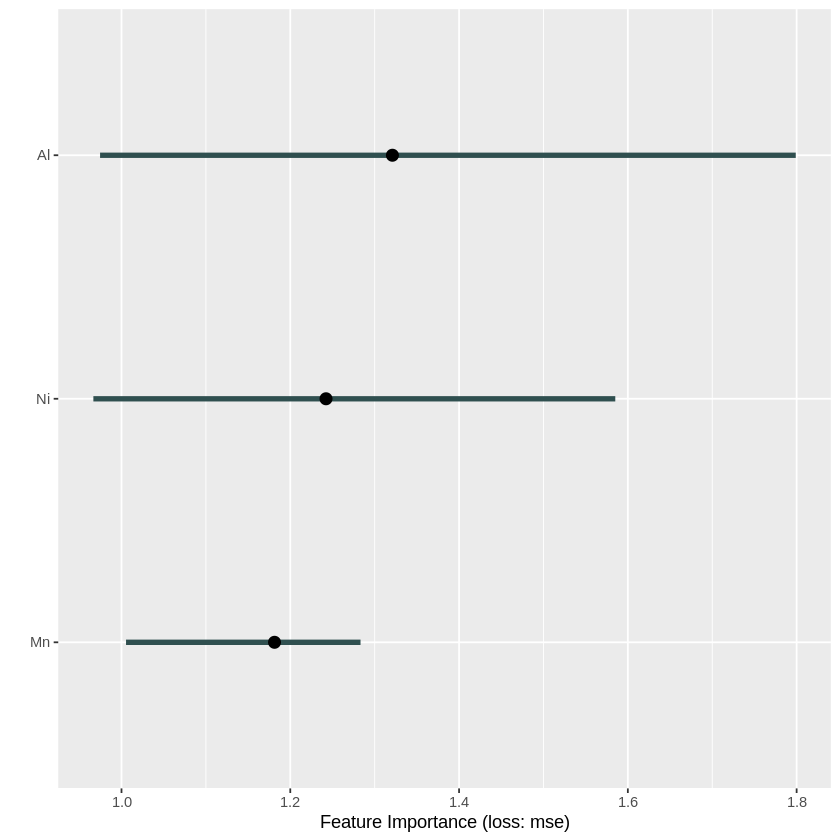

In [12]:
library(iml)
# Create a Predictor object with the model and the data frame
predictor <- Predictor$new(model, data = predictor_data, y = y)

# Compute feature importance
importance <- FeatureImp$new(predictor, loss = "mse", n.repetitions = 100)

# Plot the feature importance
importance$plot()

The plot automatically ranks features from most (largest median performance change) to least (smallest median performance change) important. Here Al is most important. Cu is calculated and not included in the ML model, therefore we're not expecting any predictions throughout the study.

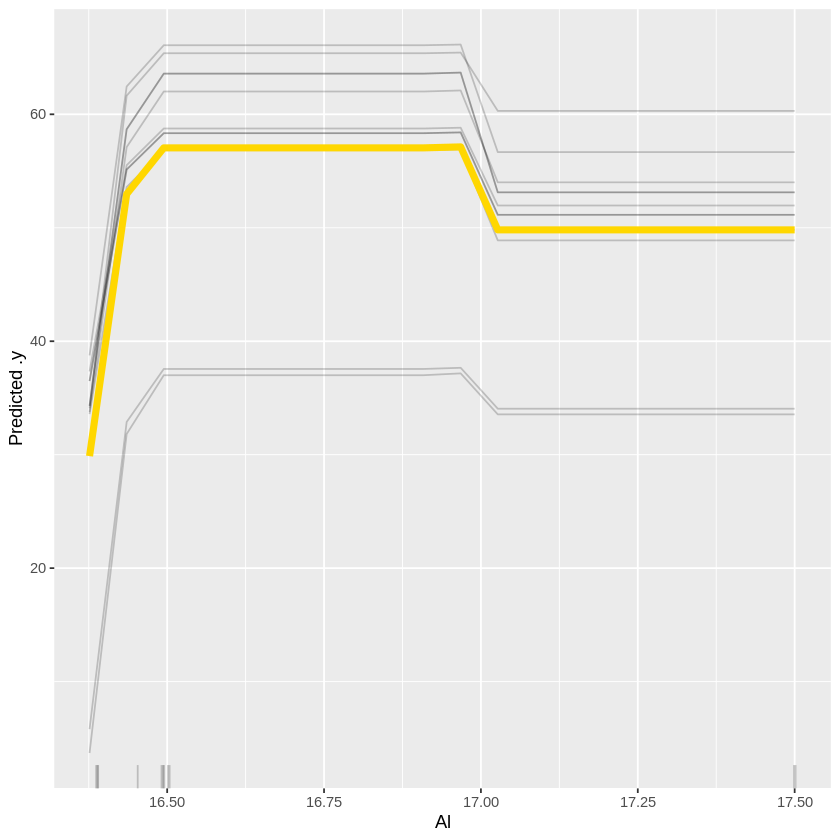

In [14]:
Al_effect <- FeatureEffect$new(predictor, feature = "Al",
                               method = "pdp+ice")
Al_effect$plot()

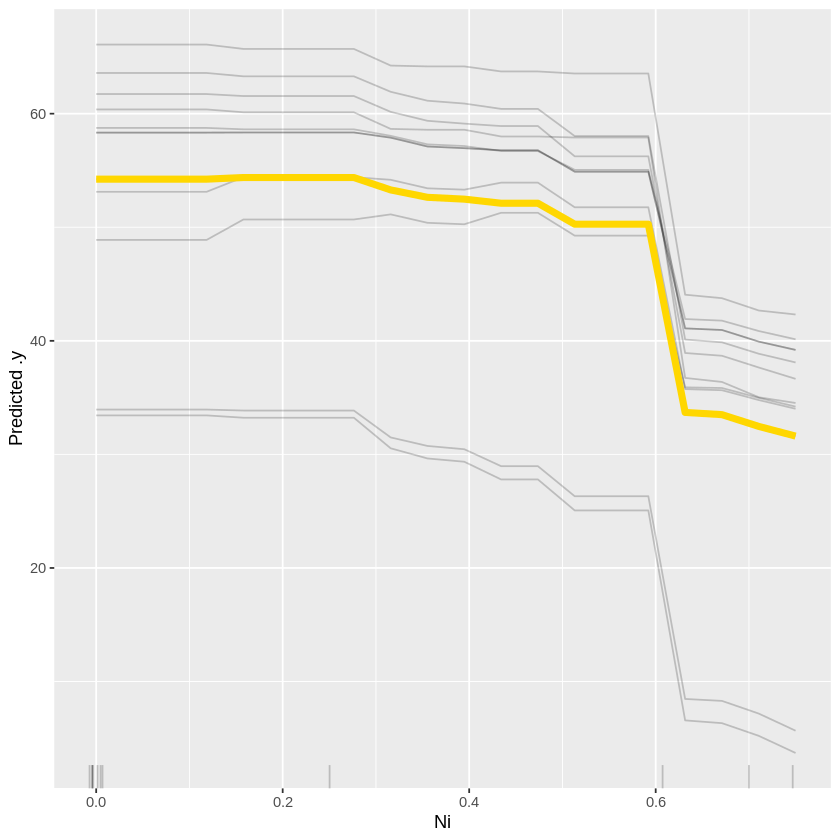

In [15]:
Ni_effect <- FeatureEffect$new(predictor, feature = "Ni",
                               method = "pdp+ice")
Ni_effect$plot()

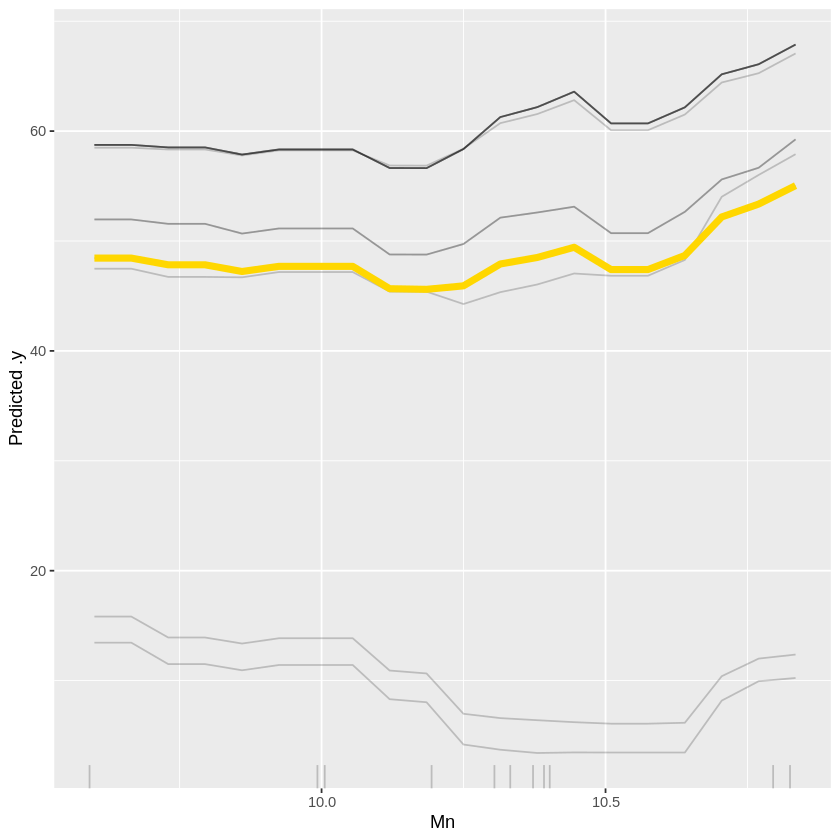

In [16]:
Mn_effect <- FeatureEffect$new(predictor, feature = "Mn",
                               method = "pdp+ice")
Mn_effect$plot()



We recommend always plotting partial dependence (PD, yellow) and individual conditional expectation (ICE, grey) curves together as PD plots on their own could mask heterogeneous effects. PD visualize global feature effects by visualizing how model predictions change on average when varying the values of a given feature of interest. ICE show local feature effects method that display how the prediction of a single observation changes when varying a feature of interest, while all other features stay constant. PD plot is the average of ICE curves.

If the ICE curves are heterogeneous, i.e., not parallel, then the model may have estimated an interaction involving the considered feature. For example, in the Mn plot, there are a few grey curves that do not follow the overall trend. This may indicate interaction between the features, but they seem insignificant for now. Having more data would help improve statistics to determine the validity of such interactions.


Loading required package: viridisLite


Attaching package: ‘viridis’


The following object is masked from ‘package:scales’:

    viridis_pal


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


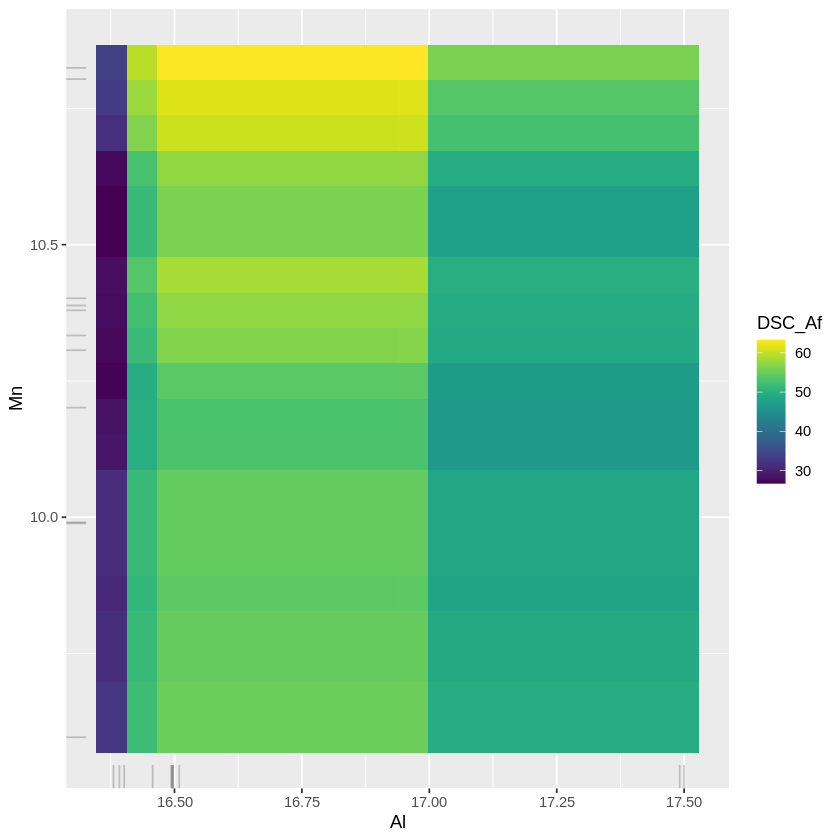

In [17]:
# install.packages("viridis")
library(viridis)
# R
# Generate the 2-way partial dependence plot
pd <- FeatureEffect$new(predictor, c("Al", "Mn"), method = "pdp")
p <- pd$plot() +
  scale_fill_viridis(option = "D")

# Change the color bar title
p <- p + labs(fill = "DSC_Af")

# Print the plot
print(p)

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


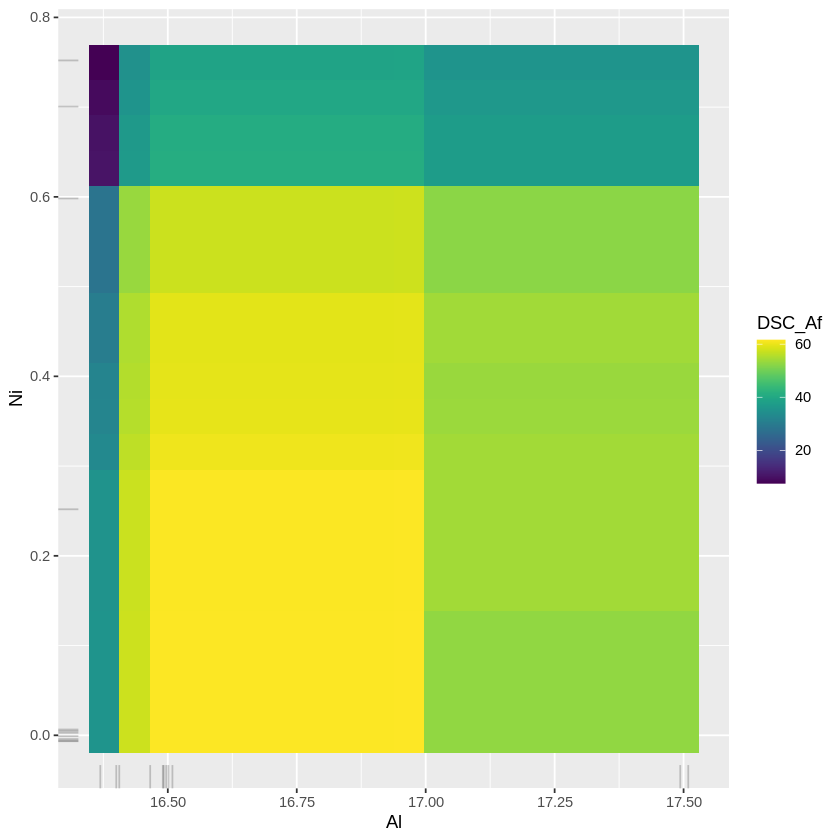

In [18]:
# install.packages("viridis")
library(viridis)
# R
# Generate the 2-way partial dependence plot
pd <- FeatureEffect$new(predictor, c("Al", "Ni"), method = "pdp")
p <- pd$plot() +
  scale_fill_viridis(option = "D")

# Change the color bar title
p <- p + labs(fill = "DSC_Af")

# Print the plot
print(p)

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


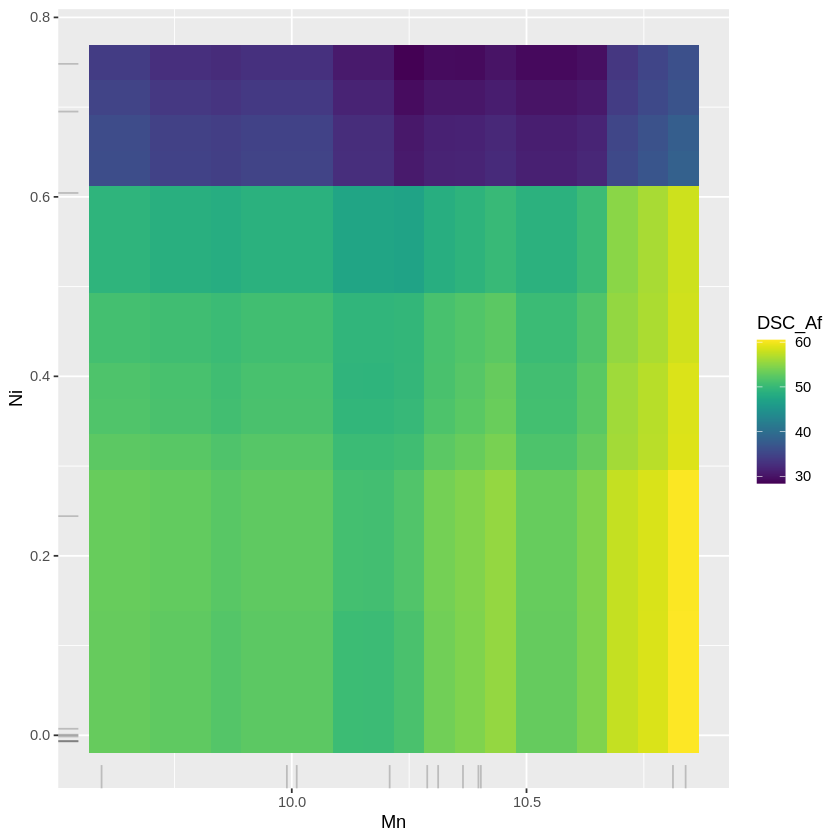

In [19]:
# install.packages("viridis")
library(viridis)
# R
# Generate the 2-way partial dependence plot
pd <- FeatureEffect$new(predictor, c("Mn", "Ni"), method = "pdp")
p <- pd$plot() +
  scale_fill_viridis(option = "D")

# Change the color bar title
p <- p + labs(fill = "DSC_Af")

# Print the plot
print(p)



We can also visualize the partial dependence of two features at once. From the PDP map, one may deduce decrease in the DSC_Af around the low Al, high Ni regions, but Mn doesn't seem to contribute much.

But be careful when drawing conclusions: This might just be a correlation and not causal! The assumption of independence is the biggest issue with PD plots. It is assumed that the feature(s) for which the partial dependence is computed are not correlated with other features. For example, suppose you want to predict how fast a person walks, given the person’s weight and height. For the partial dependence of one of the features, e.g. height, we assume that the other features (weight) are not correlated with height, which is obviously a false assumption. For the computation of the PDP at a certain height (e.g. 200 cm), we average over the marginal distribution of weight, which might include a weight below 50 kg, which is unrealistic for a 2 meter person. In other words: When the features are correlated, we create new data points in areas of the feature distribution where the actual probability is very low (for example it is unlikely that someone is 2 meters tall but weighs less than 50 kg)

If there are interactions, there are other solutions we can go try, for example, [accumulated local effects](https://christophm.github.io/interpretable-ml-book/ale.html#ale)


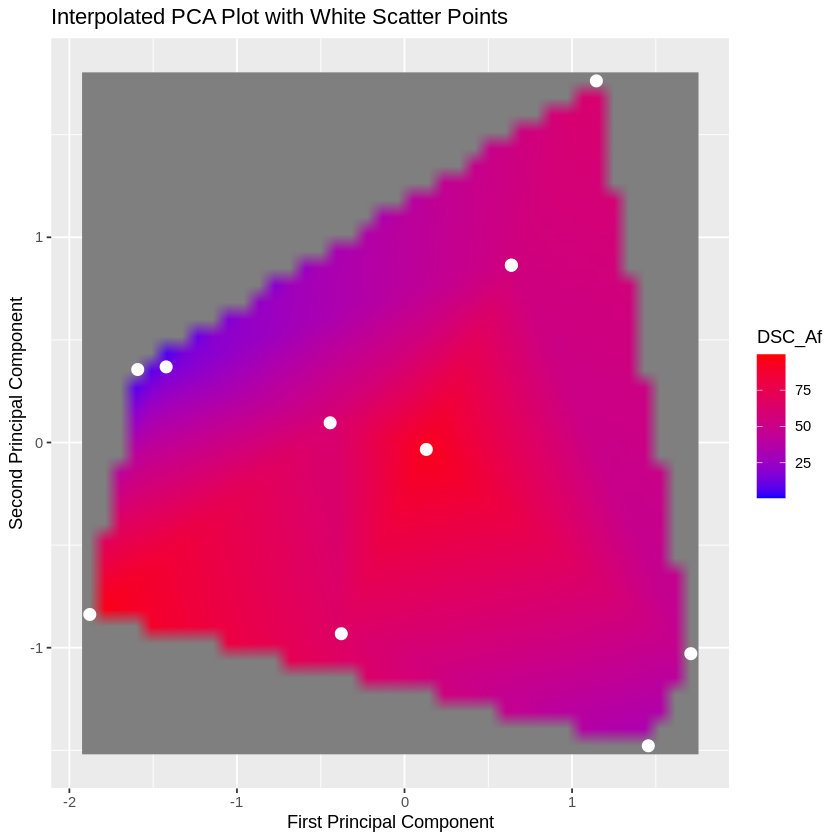

In [24]:
library(ggplot2)
# Perform PCA
pca_result <- prcomp(predictor_data, scale. = TRUE)

# Create a data frame of the first two principal components
pca_data <- data.frame(pca_result$x[,1:2])

# Add the 'Average' column to the PCA data
pca_data$DSC_Af <- y


# Install and load the akima package
if (!require(akima)) {
  install.packages("akima")
}
library(akima)

# Perform interpolation,  duplicate data are averaged, use "strip" to only use first occurance
interp_data <- with(pca_data, interp(x = PC1, y = PC2, z = DSC_Af, duplicate = "mean"))

# Convert the interpolated data to a data frame
interp_df <- data.frame(
  expand.grid(PC1 = interp_data$x, PC2 = interp_data$y),
  DSC_Af = c(interp_data$z)
)

# Create the plot
ggplot(interp_df, aes(x = PC1, y = PC2, fill = DSC_Af)) +
  geom_raster(interpolate = TRUE) +
  scale_fill_gradient(low = "blue", high = "red") +
  geom_point(data = pca_data, color = "white", size = 3) +
  xlab("First Principal Component") +
  ylab("Second Principal Component") +
  ggtitle("Interpolated PCA Plot with White Scatter Points")

This is another way of visualizing multi-dimensions in 2-dimensions. But one could also apply principle component analysis for dimensionality reduction or just to find patterns in the feature space. This is different than partial dependence which actually interprets the effects of features in the trained ML model (note the axis labels in both plots).

# UPDATE EXPERIMENT
The following assumes you have ran the batch of experiments and filled up the output file.
I have re-uploaded this file as `updated.csv` that contains (hypothetical) measured values.

In [ ]:
# Import functions (see https://github.com/hududed/mlr3mbo-demo.git for the source files)
# FOR UPDATES MAKE SURE THIS IS SOURCED, NOT mlr3mbo-demo/utils/batch.R!
source("mlr3mbo-demo/utils/update.R")

Loading required package: R.oo

Loading required package: R.methodsS3

R.methodsS3 v1.8.2 (2022-06-13 22:00:14 UTC) successfully loaded. See ?R.methodsS3 for help.

R.oo v1.25.0 (2022-06-12 02:20:02 UTC) successfully loaded. See ?R.oo for help.


Attaching package: ‘R.oo’


The following object is masked from ‘package:R.methodsS3’:

    throw


The following objects are masked from ‘package:methods’:

    getClasses, getMethods


The following objects are masked from ‘package:base’:

    attach, detach, load, save


R.utils v2.12.2 (2022-11-11 22:00:03 UTC) successfully loaded. See ?R.utils for help.


Attaching package: ‘R.utils’


The following object is masked from ‘package:mlr3’:

    resample


The following object is masked from ‘package:utils’:

    timestamp


The following objects are masked from ‘package:base’:

    cat, commandArgs, getOption, isOpen, nullfile, parse, warnings




In [ ]:
# Please upload the new updated file in your session (See Folder icon on the left pane)
file = 'updated.csv' # This is uploaded to root directory (same level as my_bucket and mlr3mbo-demo folders), feel free to set your own paths here
data <- as.data.table(read.csv(file))
data

Cu      Al      Mn      Ni   DSC_Af
1  73.9000 16.5000  9.6000 0.00 62.00 
2  72.3000 17.5000 10.2000 0.00 45.00 
3  72.1000 17.5000 10.4000 0.00 30.50 
4  73.5000 16.5000 10.0000 0.00 99.60 
5  73.1000 16.5000 10.4000 0.00 95.10 
6  72.7000 16.5000 10.8000 0.00 64.60 
7  72.1644 16.4010 10.8346 0.60 96.90 
8  72.9172 16.4588 10.3740 0.25 59.70 
9  72.5517 16.3763 10.3220 0.75  0.69 
10 73.5000 16.5000 10.0000 0.00  8.50 
11 72.6000 16.4000 10.3000 0.70 14.30 
12 72.0000 15.6000 10.2000 2.20  7.00 
13 71.0000 15.8000 10.4000 2.80  7.00 
14 70.6000 16.0000 10.4000 3.00  6.00 
15 72.4000 16.2000 10.4000 1.00  5.00 
16 72.2000 16.4000 10.2000 1.20  6.00 
17 72.0000 16.2000 10.6000 1.20  7.00 
18 71.2000 16.4000 11.8000 0.60  4.40 
19 71.8000 15.8000  9.8000 2.60  3.40 
20 72.2000 15.4000 11.8000 0.60 16.00 
21 72.4000 15.2000 10.6000 1.80 15.00 
22 72.4000 15.4000 11.6000 0.60 24.00 
23 70.6000 15.8000 10.6000 3.00  5.00 
24 72.4000 15.2000 10.6000 1.80  6.00 
25 72.4000 15.6000 10.6000 1.40  8.00 
26 71.8000 15.2000 10.6000 2.40 22.00

In [ ]:
metadata <- list(

  # RECREATE FIRST BATCH FOLDERS FOLLOWING THIS STRUCTURE, AND UPLOAD THE ASSOCIATED THREE RDS FILES there
  # e.g. my_bucket/user_id/CuAlMnNi/1
  seed = 42, # For reproducibility of results
  bucket_name = "my_bucket",  # The name of the bucket where the archive will be saved
  user_id = "my_id",  # The user ID
  table_name = "CuAlMnNi_2",  # The name of the table
  parameter_info = list(
    Al = "float",  # The type of the Al parameter
    Mn = "float",  # The type of the Mn parameter
    Ni = "float"  # The type of the Ni parameter
  ),
  parameter_ranges = list(
    Al = "(15, 19)",  # The range of the Al parameter
    Mn = "(8,13)",  # The range of the Mn parameter
    Ni = "(0,3)"  # The range of the Ni parameter
  ),
  output_column_names = c("DSC_Af"),  # The names of the output columns
  calculated_column = "Cu", # This column is ignored from the search space, but calculated in post-processing
  direction = "minimize",  # The direction of the optimization ("minimize" or "maximize")
  num_random_lines = 15,  # The number of random lines to generate
  to_nearest = 0.2,  # The value to round to

  # CHANGE THIS
  # If you are running batch 2, it will expect three RDS files in my_bucket/user_id/CuAlMnNi/1
  # If you are running batch 3, it will expect three RDS files in my_bucket/user_id/CuAlMnNi/2
  batch_number = "2"  # The batch number for the second batch
)

In [ ]:
# Run the experiment (FOR UPDATES MAKE SURE mlr3mbo-demo/utils/update.R is sourced, not batch.R)
result <- update_experiment(data, metadata)

      Cu   Al   Mn  Ni DSC_Af
 1: 72.0 15.6 10.2 2.2    7.0
 2: 71.0 15.8 10.4 2.8    7.0
 3: 70.6 16.0 10.4 3.0    6.0
 4: 72.4 16.2 10.4 1.0    5.0
 5: 72.2 16.4 10.2 1.2    6.0
 6: 72.0 16.2 10.6 1.2    7.0
 7: 71.2 16.4 11.8 0.6    4.4
 8: 71.8 15.8  9.8 2.6    3.4
 9: 72.2 15.4 11.8 0.6   16.0
10: 72.4 15.2 10.6 1.8   15.0
11: 72.4 15.4 11.6 0.6   24.0
12: 70.6 15.8 10.6 3.0    5.0
13: 72.4 15.2 10.6 1.8    6.0
14: 72.4 15.6 10.6 1.4    8.0
15: 71.8 15.2 10.6 2.4   22.0
[1] "Model archive so far: "
<Archive>
    Al   Mn   Ni DSC_Af              timestamp batch_nr
 1: 16  9.6 0.00  62.00 2024-02-12 14:01:26.66        1
 2: 18 10.2 0.00  45.00 2024-02-12 14:01:26.66        1
 3: 18 10.4 0.00  30.50 2024-02-12 14:01:26.66        1
 4: 16 10.0 0.00  99.60 2024-02-12 14:01:26.66        1
 5: 16 10.4 0.00  95.10 2024-02-12 14:01:26.66        1
 6: 16 10.8 0.00  64.60 2024-02-12 14:01:26.66        1
 7: 16 10.8 0.60  96.90 2024-02-12 14:01:26.66        1
 8: 16 10.4 0.25  59.70 2024-02-1

In [ ]:
file = 'my_bucket/my_id/CuAlMnNi_2/2/output.csv'
data <- as.data.table(read.csv(file))
data

Cu      Al      Mn      Ni   DSC_Af
1  73.9000 16.5000  9.6000 0.00 62.00 
2  72.3000 17.5000 10.2000 0.00 45.00 
3  72.1000 17.5000 10.4000 0.00 30.50 
4  73.5000 16.5000 10.0000 0.00 99.60 
5  73.1000 16.5000 10.4000 0.00 95.10 
6  72.7000 16.5000 10.8000 0.00 64.60 
7  72.1644 16.4010 10.8346 0.60 96.90 
8  72.9172 16.4588 10.3740 0.25 59.70 
9  72.5517 16.3763 10.3220 0.75  0.69 
10 73.5000 16.5000 10.0000 0.00  8.50 
11 72.6000 16.4000 10.3000 0.70 14.30 
12 72.0000 15.6000 10.2000 2.20  7.00 
13 71.0000 15.8000 10.4000 2.80  7.00 
14 70.6000 16.0000 10.4000 3.00  6.00 
15 72.4000 16.2000 10.4000 1.00  5.00 
16 72.2000 16.4000 10.2000 1.20  6.00 
17 72.0000 16.2000 10.6000 1.20  7.00 
18 71.2000 16.4000 11.8000 0.60  4.40 
19 71.8000 15.8000  9.8000 2.60  3.40 
20 72.2000 15.4000 11.8000 0.60 16.00 
21 72.4000 15.2000 10.6000 1.80 15.00 
22 72.4000 15.4000 11.6000 0.60 24.00 
23 70.6000 15.8000 10.6000 3.00  5.00 
24 72.4000 15.2000 10.6000 1.80  6.00 
25 72.4000 15.6000 10.6000 1.40  8.00 
26 71.8000 15.2000 10.6000 2.40 22.00 
27 71.8000 15.6000 10.6000 2.00    NA 
28 72.2000 15.4000 10.6000 1.80    NA 
29 71.8000 15.8000 10.6000 1.80    NA 
30 70.6000 15.8000 10.6000 3.00    NA 
31 70.8000 15.8000 10.6000 2.80    NA 
32 71.0000 15.4000 10.6000 3.00    NA 
33 72.4000 15.6000 10.6000 1.40    NA 
34 71.4000 15.8000 10.6000 2.20    NA 
35 71.4000 15.6000 10.6000 2.40    NA 
36 72.4000 15.8000 10.6000 1.20    NA 
37 71.4000 15.2000 10.6000 2.80    NA 
38 70.6000 15.8000 10.6000 3.00    NA 
39 73.0000 15.0000 10.6000 1.40    NA 
40 72.0000 15.8000 10.6000 1.60    NA 
41 71.8000 15.2000 10.6000 2.40    NA